In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, ensemble, svm, tree, neural_network

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
result = {}

In [3]:
#hhids=[86, 59, 77, 26, 93, 101, 114, 171, 1086, 1403]
hhids=[26, 59, 77, 86, 93, 94, 101, 114, 171, 187]
#hhids=[86]
for hhid in hhids: 
    X=[]
    result[hhid] = []
    print('Start :: Process on household {}...'.format(hhid))
    df = pd.read_csv('data_filled2/processed_hhdata_{}_2.csv'.format(hhid), index_col=0)

    features = [ 'GH','temperature', 'cloud_cover','wind_speed','is_weekday','month','hour']
    
    Y = list(df.use)[500:]
    Y = np.array(Y)
    print(Y.shape)
    print(Y[0])
    
    #get X
    for index, row in df.iterrows():
        if index>=500:
            rowlist=row[features]
            rowlist = rowlist.tolist()
            X.append(rowlist)
            rowlist.append(df.use.iloc[index-1])
            #rowlist.append(df.use.iloc[index-2])
            #rowlist.append(df.use.iloc[index-23])
            #rowlist.append(df.use.iloc[index-24])
            rowlist.append(df.use.iloc[index-168])
            
#             for i in range(1,169):
#                 rowlist.append(df.use.iloc[index-i])
                
             
    #X = df[features]
    X = np.array(X)
    print(X.shape)
    print(X[0])
    print(len(X[0]))



    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=0.10,
                                                        random_state=666)


    classifiers = [
        linear_model.Ridge(alpha=1.0, random_state=0),
        linear_model.Lasso(alpha=0.55, random_state=0),
        linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06),
        linear_model.LassoLars(alpha=0.55),
        linear_model.LinearRegression(),
        ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        tree.DecisionTreeRegressor(),
        neural_network.MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    ]


    print('Start :: Find the best model for this household...')
    for clf in classifiers:
        clf.fit(X_train, Y_train)
#         print(clf)
        yhat = clf.predict(X_test)
        scores = cross_val_score(clf, X_train, Y_train)
        rmse = np.sqrt(mean_squared_error(Y_test, yhat))
        nrmse = rmse/(df.use.max()-df.use.min())
        mae = mean_absolute_error(Y_test, yhat)
        print('RMSE =>', rmse)
        print('nRMSE =>', nrmse)
        print('MAE =>', mae)
        print('CV Score =>', scores)
        model_dict = {
            'name': clf.__class__.__name__,
            'rmse': rmse,
            'nrmse': nrmse,
            'mae': mae,
        }
        result[hhid].append(model_dict)
#         print('')

Start :: Process on household 26...
(8285,)
0.778933333333333
(8285, 9)
[-3.39976    48.71        0.          5.15        1.          1.
 20.          0.92853333  1.83546667]
9
Start :: Find the best model for this household...
RMSE => 0.9027664840156785
nRMSE => 0.12400013973870526
MAE => 0.6611822406489454
CV Score => [0.37337639 0.37417265 0.38818989]
RMSE => 0.9806610163935714
nRMSE => 0.13469939926014324
MAE => 0.7344680709243989
CV Score => [0.26175018 0.25891343 0.2756009 ]
RMSE => 0.9028794858340536
nRMSE => 0.12401566118474623
MAE => 0.6613921572758598
CV Score => [0.37327283 0.37431695 0.38801239]
RMSE => 1.145214577221412
nRMSE => 0.15730177196497594
MAE => 0.8971386080121999
CV Score => [-0.00051806 -0.00209793 -0.0052237 ]
RMSE => 0.902764366939711
nRMSE => 0.123999848946213
MAE => 0.6611775704869983
CV Score => [0.37337764 0.37416781 0.38819241]
RMSE => 0.7353825827880375
nRMSE => 0.1010090035924982
MAE => 0.4774630355972182
CV Score => [0.53634092 0.55251711 0.59440665]


RMSE => 0.5064908644408797
nRMSE => 0.09261067423997167
MAE => 0.2435509874580156
CV Score => [0.39248932 0.37464203 0.39067911]
RMSE => 0.8006239421441197
nRMSE => 0.14639222205218227
MAE => 0.3730174269792665
CV Score => [-0.13267692 -0.18808735 -0.33859441]
RMSE => 3.0473271204722407
nRMSE => 0.5571966625068857
MAE => 0.907798249371506
CV Score => [-4.00315853  0.19909591 -1.75963338]
Start :: Process on household 114...
(8285,)
1.1668333333333332
(8285, 9)
[-3.39976    48.71        0.          5.15        1.          1.
 20.          3.29118333  1.30851667]
9
Start :: Find the best model for this household...
RMSE => 0.8281009245134874
nRMSE => 0.11393062147635274
MAE => 0.6073982163439926
CV Score => [0.29335517 0.2619295  0.27730049]
RMSE => 0.8907747789083257
nRMSE => 0.12255332792450388
MAE => 0.6810180197425719
CV Score => [0.18264096 0.15878057 0.17320342]
RMSE => 0.8281221786982759
nRMSE => 0.1139335456398336
MAE => 0.6074898367170146
CV Score => [0.29293189 0.26191478 0.277

In [4]:
final = []
for k, v in result.items():
    for i in result[k]:
        final.append([str(k), i['name'], i['rmse'],i['nrmse'], i['mae']])
col = ['household_id', 'alg', 'RMSE','nRMSE', 'MAE']
final = pd.DataFrame(data=final, columns=col)
final.to_csv('HL.csv')

In [5]:
final = pd.read_csv('HL.csv', index_col=0)
final

,household_id,alg,RMSE,nRMSE,MAE
0,26,Ridge,0.902766,0.124000,0.661182
1,26,Lasso,0.980661,0.134699,0.734468
2,26,BayesianRidge,0.902879,0.124016,0.661392
3,26,LassoLars,1.145215,0.157302,0.897139
4,26,LinearRegression,0.902764,0.124000,0.661178
5,26,RandomForestRegressor,0.735383,0.101009,0.477463
6,26,DecisionTreeRegressor,1.023790,0.140623,0.644003
7,26,MLPRegressor,0.851500,0.116958,0.611523
8,59,Ridge,1.048907,0.116763,0.781803
9,59,Lasso,1.174538,0.130748,0.928699


In [6]:
gb = final.groupby('alg')

In [7]:
N = 9
ind = range(N)
mean = list(gb['nRMSE'].describe()['mean'])
mean.append(0.12464348324161187)
std = list(gb['nRMSE'].describe()['std'])
std.append(0.04447879299698875)

In [8]:
ind, mean, std

(range(0, 9),
 [0.10973145280233947,
  0.1194441489811062,
  0.11793757580994346,
  0.13560120221004743,
  0.10972766038840102,
  0.1864441628519181,
  0.08351516051974237,
  0.1097277140331359,
  0.12464348324161187],
 [0.011920792955654813,
  0.017779723978489814,
  0.015074516683956124,
  0.017738444378640528,
  0.011917432023443978,
  0.1364212809328547,
  0.011720843306930788,
  0.011917458542374476,
  0.04447879299698875])

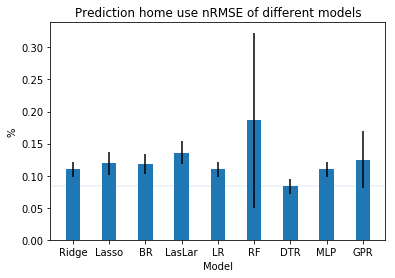

In [9]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# # ax2 = ax.twinx()
# ax.set_ylabel('RMSE1')
# # ax2.set_ylabel('RMSE2')


# # ax.bar(ind, ghi_mean, 0.3, yerr=ghi_std, color='red', align='center')
# # ax.autoscale(tight=True)
# plt.show()

plt.bar(ind, mean, 0.4, yerr=std, align='center')
plt.ylabel('%')
plt.xlabel('Model')
plt.title('Prediction home use nRMSE of different models')
plt.xticks(ind, ('Ridge', 'Lasso','BR' ,'LasLar', 'LR', 'RF', 'DTR', 'MLP','GPR'))
# plt.yticks(np.arange(0, 2))
plt.axhline(y=gb['nRMSE'].describe()['mean']['RandomForestRegressor'], linewidth=0.15)
plt.savefig('hl.png')

In [10]:
fig = plt.figure()